In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from statsmodels.formula.api import ols

In [14]:
new = pd.read_excel(r'C:\Users\SNEHA\Downloads\AirPollution.xls')
new.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer


In [15]:
new=new.drop(['Site','Date','Season','Zn'],axis=1)
new.head()

,PM10,Pb,Cd,Cu,Cr,NOx,SO2
0,120.71,2.67,0.01,0.53,0.61,84.17,40.37
1,140.25,3.49,0.02,0.10,0.91,88.81,39.48
2,107.01,1.31,0.01,0.19,0.48,81.49,48.29
3,88.81,0.76,0.00,0.33,0.39,61.80,27.42
4,75.05,0.60,0.00,0.41,1.54,48.71,19.23


# Data type

In [16]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    151 non-null    float64
 1   Pb      151 non-null    float64
 2   Cd      151 non-null    float64
 3   Cu      151 non-null    float64
 4   Cr      151 non-null    float64
 5   NOx     151 non-null    float64
 6   SO2     151 non-null    float64
dtypes: float64(7)
memory usage: 8.4 KB


# Univariant analysis

In [17]:
new.describe()

,PM10,Pb,Cd,Cu,Cr,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,68.536026,0.716358,0.000265,0.331854,0.390066,42.692914,22.359868
std,40.908548,0.673069,0.001982,0.408259,0.434575,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,0.000000,8.260000,0.000000
25%,37.005000,0.220000,0.000000,0.040000,0.085000,25.735000,15.165000
50%,59.610000,0.570000,0.000000,0.130000,0.230000,37.000000,20.930000
75%,89.820000,0.965000,0.000000,0.535000,0.580000,54.695000,27.420000
max,194.740000,3.490000,0.020000,1.650000,3.220000,121.460000,53.270000


# Identify outliers

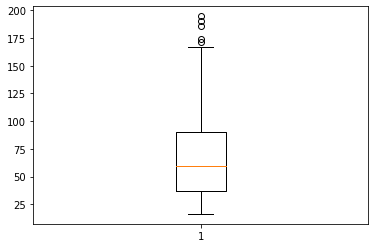

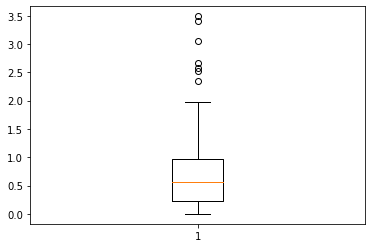

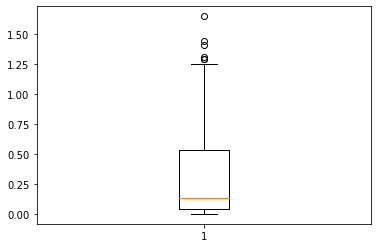

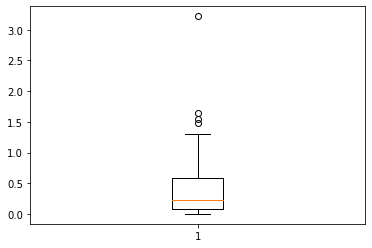

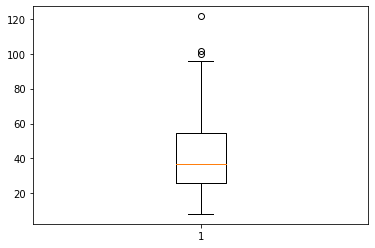

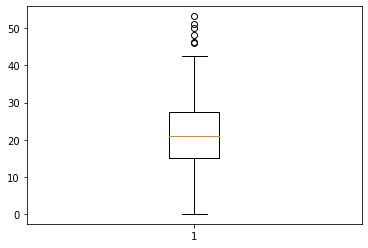

In [18]:
import matplotlib.pyplot as plt
j=['PM10','Pb','Cu','Cr','NOx','SO2']
for i in j:
    plt.figure()
    plt.boxplot(new[i])

In [19]:
def outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_limit =q3+ 1.5*iqr
    lower_limit =q1- 1.5*iqr
    
    df[col]=np.where(df[col]>upper_limit,upper_limit,
                     np.where(df[col]<lower_limit,lower_limit,df[col]))
    return df[col]

       PM10      Pb    Cu      Cr   Cd    NOx      SO2
0    120.71  2.0825  0.53  0.6100  0.0  84.17  40.3700
1    140.25  2.0825  0.10  0.9100  0.0  88.81  39.4800
2    107.01  1.3100  0.19  0.4800  0.0  81.49  45.8025
3     88.81  0.7600  0.33  0.3900  0.0  61.80  27.4200
4     75.05  0.6000  0.41  1.3225  0.0  48.71  19.2300
..      ...     ...   ...     ...  ...    ...      ...
146   40.13  0.1000  0.04  0.0900  0.0  18.88  10.0900
147   40.38  0.1000  0.03  0.0900  0.0  47.56  24.1400
148   31.28  0.1100  0.02  0.0500  0.0  31.53  26.6400
149   52.10  0.4800  0.04  0.0600  0.0  42.08  22.9500
150   27.19  0.0200  0.02  0.0300  0.0  53.29  36.2400

[151 rows x 7 columns]
       PM10      Pb    Cu      Cr   Cd    NOx      SO2
0    120.71  2.0825  0.53  0.6100  0.0  84.17  40.3700
1    140.25  2.0825  0.10  0.9100  0.0  88.81  39.4800
2    107.01  1.3100  0.19  0.4800  0.0  81.49  45.8025
3     88.81  0.7600  0.33  0.3900  0.0  61.80  27.4200
4     75.05  0.6000  0.41  1.3225  0.0  4

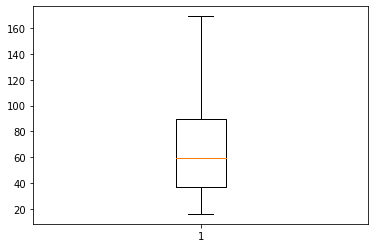

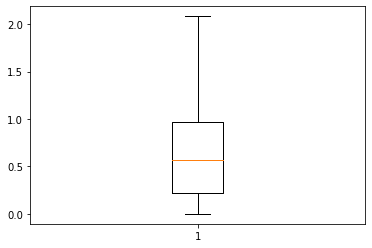

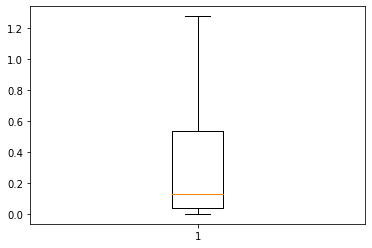

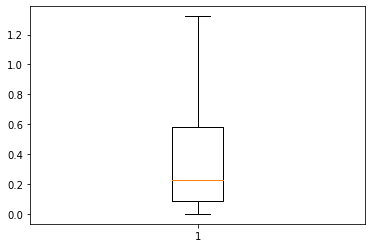

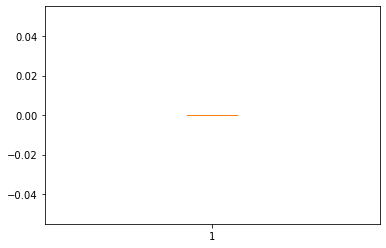

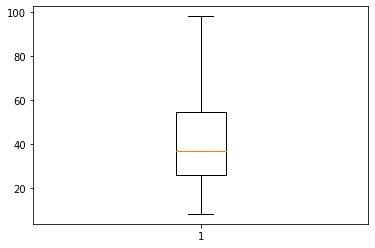

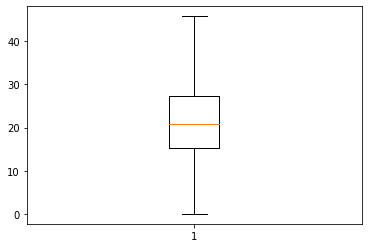

In [20]:
j=['PM10','Pb','Cu','Cr','Cd','NOx','SO2']

for i in j:
    print(outliers(new,j))
    
for x in j:
    plt.figure()
    plt.boxplot(new[x])

<AxesSubplot:ylabel='Cd'>

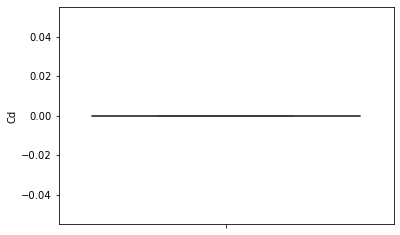

In [21]:
sns.boxplot(y='Cd',data=new)

# Identify null values

In [11]:
new.isna().sum()

PM10    0
Pb      0
Cd      0
Cu      0
Cr      0
NOx     0
SO2     0
dtype: int64

# Data partition

In [31]:
x = new.drop('PM10',axis=1)
y =new[['PM10']]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=89)

In [32]:
train = pd.concat([x_train,y_train],axis=1)
train.head()

,Pb,Cu,Cr,NOx,SO2,PM10
141,0.00,0.00,0.00,22.41,13.26,40.76
97,1.29,0.78,1.03,29.65,10.49,140.26
87,0.29,0.09,0.23,19.87,10.06,45.65
24,0.77,0.54,0.48,49.40,20.82,65.12
111,0.00,0.00,0.00,19.82,13.72,31.51


# Correlation

In [33]:
train.corr()

,Pb,Cu,Cr,NOx,SO2,PM10
Pb,1.000000,0.700617,0.817430,0.782326,0.705677,0.896412
Cu,0.700617,1.000000,0.785435,0.537659,0.483920,0.726921
Cr,0.817430,0.785435,1.000000,0.616463,0.590865,0.850119
NOx,0.782326,0.537659,0.616463,1.000000,0.883621,0.712305
SO2,0.705677,0.483920,0.590865,0.883621,1.000000,0.671923
PM10,0.896412,0.726921,0.850119,0.712305,0.671923,1.000000


<AxesSubplot:>

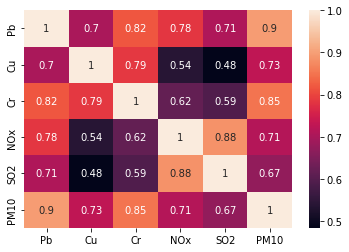

In [34]:
sns.heatmap(train.corr(),annot=True)

# Multicolinearity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x1= new.drop('PM10',axis=1)
series_before=pd.Series([variance_inflation_factor(x1.values,i)
                        for i in range(x1.shape[1])],
                       index=x1.columns)
series_before

Pb      8.933000
Cu      4.771816
Cr      7.989952
NOx    21.479993
SO2    18.211013
dtype: float64

# Model building

#### H0: There is no relationship between PM10 and other parameters

#### vs

#### H1: There is relationship between PM10 and other parameters

#### Alpha=0.05

In [36]:
from statsmodels.formula.api import ols
model=ols('PM10 ~ Pb+Cu+Cr+NOx+SO2',data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     111.5
Date:                Wed, 18 May 2022   Prob (F-statistic):           4.52e-39
Time:                        08:32:46   Log-Likelihood:                -440.60
No. Observations:                 105   AIC:                             893.2
Df Residuals:                      99   BIC:                             909.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.7367      4.137      4.771      0.000      11.528      27.945
Pb            40.8524      6.327      6.457      0.000      28.298      53.406
Cu             6.9508      6.511      1.068      0.288      -5.968      19.870
Cr            34.7555      9.172      3.789      0.000      16.556      52.955
NOx           -0.0527      0.174     -0.302      0.763      -0.399       0.293
SO2            0.3741      0.349      1.072      0.286      -0.318       1.066
==============================================================================
Omnibus:                       11.202   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.718
Skew:                           0.695   Prob(JB):                      0.00285
Kurtosis:                       3.863   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
* 84% accuracy of model
* 

# Assumption in model

## Linearity

In [ ]:
sns.scatterplot(x='',y='',data=train)

## Constant variance

In [37]:
train['fitted_values']=model.fittedvalues
train['residual']=model.resid
train.head()

,Pb,Cu,Cr,NOx,SO2,PM10,fitted_values,residual
141,0.00,0.00,0.00,22.41,13.26,40.76,23.515886,17.244114
97,1.29,0.78,1.03,29.65,10.49,140.26,116.017254,24.242746
87,0.29,0.09,0.23,19.87,10.06,45.65,42.919176,2.730824
24,0.77,0.54,0.48,49.40,20.82,65.12,76.813607,-11.693607
111,0.00,0.00,0.00,19.82,13.72,31.51,23.824517,7.685483


<AxesSubplot:xlabel='fitted_values', ylabel='residual'>

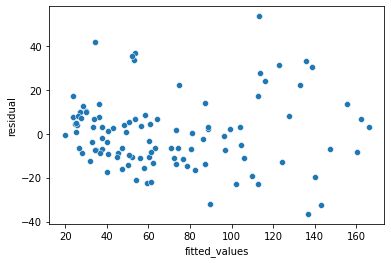

In [38]:
sns.scatterplot(x='fitted_values',y='residual',data=train)

## Normality

C:\Users\SNEHA\AppData\Local\Temp/ipykernel_15932/1360547913.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


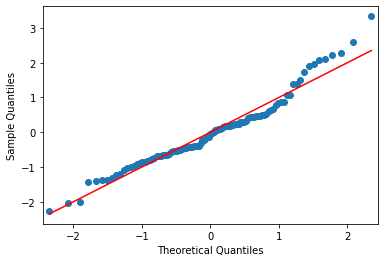

In [39]:
import statsmodels.api as sm 
fig =sm.qqplot(train['residual'],fit=True,line='s')
fig.show()

## Model error should be IID

C:\Users\SNEHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual', ylabel='Density'>

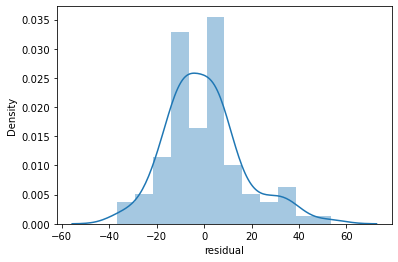

In [40]:
sns.distplot(train.residual)

# Prediction

In [41]:
test=pd.concat([x_test,y_test],axis=1)
test.head()

,Pb,Cu,Cr,NOx,SO2,PM10
104,0.39,0.00,0.05,36.96,12.16,46.84
117,0.08,0.01,0.02,24.08,16.65,29.97
14,0.41,0.05,0.11,20.40,12.84,28.50
32,0.37,0.17,0.19,42.75,30.80,37.28
137,0.00,0.00,0.00,13.21,9.08,61.89


In [42]:
test['predicted']=model.predict(test)
test.head()

,Pb,Cu,Cr,NOx,SO2,PM10,predicted
104,0.39,0.00,0.05,36.96,12.16,46.84,40.007496
117,0.08,0.01,0.02,24.08,16.65,29.97,28.728864
14,0.41,0.05,0.11,20.40,12.84,28.50,44.384839
32,0.37,0.17,0.19,42.75,30.80,37.28,51.905911
137,0.00,0.00,0.00,13.21,9.08,61.89,22.437150
